In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

#Read the csv
#use the GPA and GPA*SAT column to make an accurate finding of students for submission
data = pd.read_csv('GPA and SAT data.csv')
data.head()

,Student,Rand,GPA,SAT,GPA*SAT
0,1,1,1.161372,906,1052.203131
1,2,1,1.586621,768,1218.525281
2,3,2,2.707815,1406,3807.187748
3,4,1,1.720229,913,1570.569439
4,5,1,1.363763,1458,1988.366906


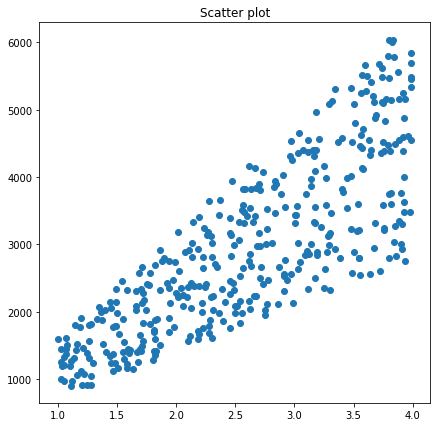

In [29]:
#Plot the GPA and GPA*SAT 
#From this we can see that there are clusters that are considered high achivers and those that are considered average and low achivers.
plt.figure(figsize=(7,7))
plt.title("Scatter plot") 
plt.scatter(data['GPA'], data['GPA*SAT']) 


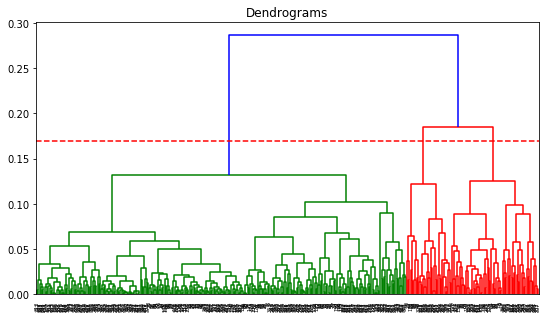

In [34]:
#data_scaled = pd.DataFrame(data, columns=data.columns)
#We normalize the data and get the data attached to a dendrogram
#We use the dendrogram to make a cut off on how many clusters we would like to make

data_normalized = normalize(data)
#data_normalized = normalize
plt.figure(figsize=(9, 5))  
plt.title("Dendrograms")  
plt.axhline(y = 0.17, color="r", linestyle = '--')
dend = shc.dendrogram(shc.linkage(data_normalized, method='average'))



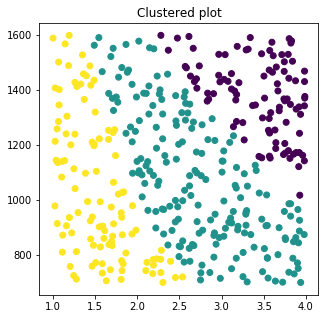

In [37]:
#Useing the dendrogram above we can use that to make our clusters from the GPA and SAT scores
#We will first use AgglomerativeClustering to cluster the values based on the number of clusters needed
cluster = AgglomerativeClustering(n_clusters=3, affinity='l2', linkage='average')  
#We fit the the cluster to the data
cluster.fit_predict(data)
#plot!
plt.figure(figsize=(5, 5))
plt.title("Clustered plot") 
plt.scatter(data['GPA'], data['SAT'], c=cluster.labels_) 